### RQ3: Was there a difference between industrial and domestic energy consumption patterns?

for this RQ, we can consider both industrial and domestic energy consumption patterns seperately for both electricity and gas seperately.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind

## Electricity

In [2]:
# Load the dataset of domestic electricity consumption
dom_ele_consumption= pd.read_csv('Household Electricity Consumption_1.csv')
dom_ele_consumption.head()

,ID,Statistic Label,TLIST(A1),Year,Type of Dwelling,UNIT,VALUE
0,DBEREL01C01,Household Electricity Consumption,2015,2015,Apartment,Mean kilowatt-hours,4747.0
1,DBEREL01C01,Household Electricity Consumption,2015,2015,Apartment,Mean kilowatt-hours,5421.0
2,DBEREL01C01,Household Electricity Consumption,2015,2015,Apartment,Mean kilowatt-hours,5254.0
3,DBEREL01C01,Household Electricity Consumption,2015,2015,Apartment,Mean kilowatt-hours,4867.0
4,DBEREL01C01,Household Electricity Consumption,2015,2015,Apartment,Mean kilowatt-hours,3934.0


In [3]:
dom_ele_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                288 non-null    object 
 1   Statistic Label   288 non-null    object 
 2   TLIST(A1)         288 non-null    int64  
 3   Year              288 non-null    int64  
 4   Type of Dwelling  288 non-null    object 
 5   UNIT              288 non-null    object 
 6   VALUE             280 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 15.9+ KB


In [4]:
dom_ele_consumption.describe()

,TLIST(A1),Year,VALUE
count,288.000000,288.000000,280.000000
mean,2018.500000,2018.500000,5249.935714
std,2.295276,2.295276,1081.435524
min,2015.000000,2015.000000,2935.000000
25%,2016.750000,2016.750000,4500.000000
50%,2018.500000,2018.500000,5217.000000
75%,2020.250000,2020.250000,5732.750000
max,2022.000000,2022.000000,9439.000000


In [5]:
# Convert 'Year' to datetime
dom_ele_consumption['Year'] = pd.to_datetime(dom_ele_consumption['Year'], format='%Y')

In [6]:
# check for missing values
dom_ele_consumption.isnull().sum()

ID                  0
Statistic Label     0
TLIST(A1)           0
Year                0
Type of Dwelling    0
UNIT                0
VALUE               8
dtype: int64

In [7]:
dom_ele_consumption = dom_ele_consumption.dropna()

In [8]:
# Calculate the average value for each year
average_by_year = dom_ele_consumption.groupby('Year')['VALUE'].mean().reset_index()

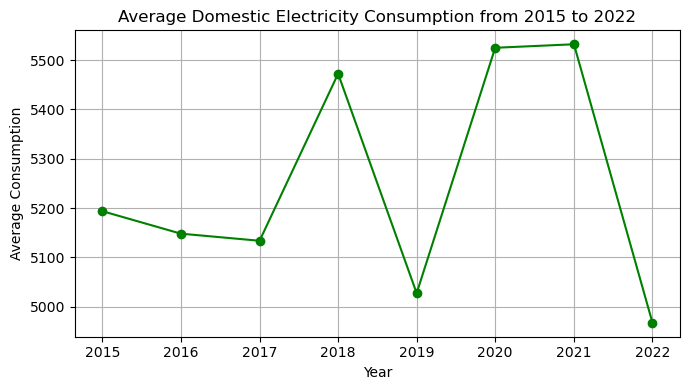

In [35]:
# Plotting
plt.figure(figsize=(7,4))
plt.plot(average_by_year['Year'], average_by_year['VALUE'], marker='o', color='g', linestyle='-')
plt.title('Average Domestic Electricity Consumption from 2015 to 2022')
plt.xlabel('Year')
plt.ylabel('Average Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Load the dataset of domestic electricity consumption
non_dom_ele_consumption= pd.read_csv('Non-Domestic Electricity Consumption_1.csv')
non_dom_ele_consumption.head()

,ID,Statistic Label,TLIST(A1),Year,C04042V04804,Type of Building,C03440V04149,Energy Rating,UNIT,VALUE
0,NBEREL01C01,Non-Domestic Electricity Consumption,2015,2015,10,Community/day centre,13,A - B,Mean kilowatt-hours,27244.0
1,NBEREL01C01,Non-Domestic Electricity Consumption,2015,2015,10,Community/day centre,07,C,Mean kilowatt-hours,28808.0
2,NBEREL01C01,Non-Domestic Electricity Consumption,2015,2015,10,Community/day centre,08,D,Mean kilowatt-hours,22872.0
3,NBEREL01C01,Non-Domestic Electricity Consumption,2015,2015,10,Community/day centre,09,E,Mean kilowatt-hours,27276.0
4,NBEREL01C01,Non-Domestic Electricity Consumption,2015,2015,10,Community/day centre,10,F- G,Mean kilowatt-hours,18539.0


In [11]:
# Convert 'Year' to datetime
non_dom_ele_consumption['Year'] = pd.to_datetime(non_dom_ele_consumption['Year'], format='%Y')

In [12]:
non_dom_ele_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                288 non-null    object        
 1   Statistic Label   288 non-null    object        
 2   TLIST(A1)         288 non-null    int64         
 3   Year              288 non-null    datetime64[ns]
 4   C04042V04804      288 non-null    object        
 5   Type of Building  288 non-null    object        
 6   C03440V04149      288 non-null    object        
 7   Energy Rating     288 non-null    object        
 8   UNIT              288 non-null    object        
 9   VALUE             280 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 22.6+ KB


In [13]:
# check for missing values
non_dom_ele_consumption.isnull().sum()

ID                  0
Statistic Label     0
TLIST(A1)           0
Year                0
C04042V04804        0
Type of Building    0
C03440V04149        0
Energy Rating       0
UNIT                0
VALUE               8
dtype: int64

In [14]:
non_dom_ele_consumption = non_dom_ele_consumption.dropna()

In [15]:
# Calculate the average value for each year
average_by_year_nondom = non_dom_ele_consumption.groupby('Year')['VALUE'].mean().reset_index()

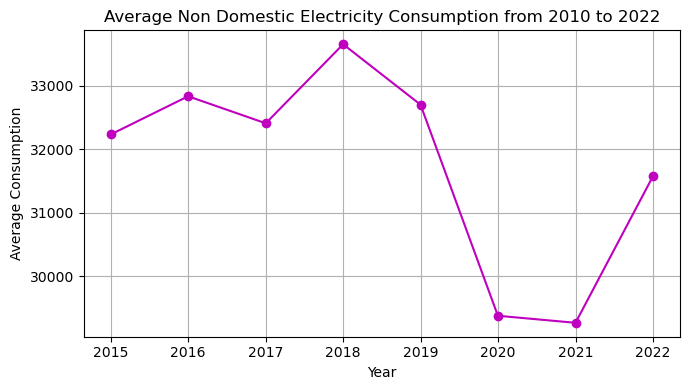

In [16]:
# Plotting
plt.figure(figsize=(7,4))
plt.plot(average_by_year_nondom['Year'], average_by_year_nondom['VALUE'], marker='o', color='m', linestyle='-')
plt.title('Average Non Domestic Electricity Consumption from 2010 to 2022')
plt.xlabel('Year')
plt.ylabel('Average Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

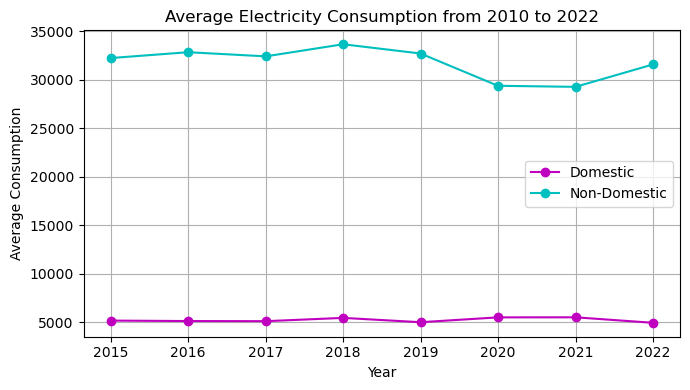

In [33]:
import matplotlib.pyplot as plt

# Plotting both datasets on the same figure
plt.figure(figsize=(7, 4))

# Plotting average domestic electricity consumption
plt.plot(average_by_year['Year'], average_by_year['VALUE'], marker='o', color='m', linestyle='-', label='Domestic')

# Plotting average non-domestic electricity consumption
plt.plot(average_by_year_nondom['Year'], average_by_year_nondom['VALUE'], marker='o', color='c', linestyle='-', label='Non-Domestic')

# Adding titles and labels
plt.title('Average Electricity Consumption from 2010 to 2022')
plt.xlabel('Year')
plt.ylabel('Average Consumption')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


### Independent Sample t - test.

In [17]:
# Extract the 'VALUE' columns
dom_values = dom_ele_consumption['VALUE']
non_dom_values = non_dom_ele_consumption['VALUE']

# Perform the independent t-test
t_stat, p_value = ttest_ind(dom_values, non_dom_values, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Common significance level
if p_value < alpha:
    print("There is a significant difference between domestic and non-domestic electricity consumption.")
else:
    print("There is no significant difference between domestic and non-domestic electricity consumption.")

T-statistic: -25.993991404933553
P-value: 9.305220760851033e-77
There is a significant difference between domestic and non-domestic electricity consumption.


## Gas

In [18]:
# Load the dataset of domestic electricity consumption
dom_gas_consumption= pd.read_csv('Mean Gas Consumption_1.csv')
dom_gas_consumption.head()

,id,STATISTIC Label,TLIST(A1),Year,C03151V03803,Type of dwelling,C03440V04149,Energy rating,UNIT,VALUE
0,DBERNG01,Mean Gas Consumption,2015,2015,01,Apartment,13,A - B,Mean kilowatt hours,6954.0
1,DBERNG01,Mean Gas Consumption,2015,2015,01,Apartment,07,C,Mean kilowatt hours,7635.0
2,DBERNG01,Mean Gas Consumption,2015,2015,01,Apartment,08,D,Mean kilowatt hours,7846.0
3,DBERNG01,Mean Gas Consumption,2015,2015,01,Apartment,09,E,Mean kilowatt hours,8029.0
4,DBERNG01,Mean Gas Consumption,2015,2015,01,Apartment,10,F- G,Mean kilowatt hours,8353.0


In [19]:
# Convert 'Year' to datetime
dom_gas_consumption['Year'] = pd.to_datetime(dom_gas_consumption['Year'], format='%Y')

In [20]:
# check for missing values
dom_gas_consumption.isnull().sum()

id                  0
STATISTIC Label     0
TLIST(A1)           0
Year                0
C03151V03803        0
Type of dwelling    0
C03440V04149        0
Energy rating       0
UNIT                0
VALUE               8
dtype: int64

In [21]:
dom_gas_consumption = dom_gas_consumption.dropna()

In [22]:
# Calculate the average value for each year
average_dom_gas = dom_gas_consumption.groupby('Year')['VALUE'].mean().reset_index()

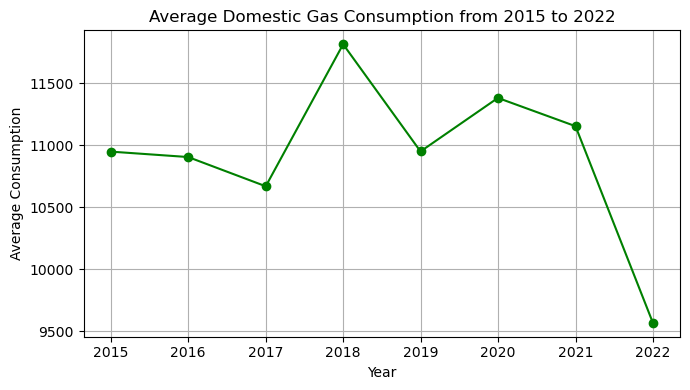

In [34]:
# Plotting
plt.figure(figsize=(7,4))
plt.plot(average_dom_gas['Year'], average_dom_gas['VALUE'], marker='o', color='g', linestyle='-')
plt.title('Average Domestic Gas Consumption from 2015 to 2022')
plt.xlabel('Year')
plt.ylabel('Average Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Load the dataset of domestic electricity consumption
non_dom_gas_consumption= pd.read_csv('gasconsumption_2024-05-30_232017.csv')
non_dom_gas_consumption.head()

,Name,Location,Date,Value,Unit
0,DM - Gas Consumption by Market Sector,DM,2016-01-01,281916625,kWh
1,DM - Gas Consumption by Market Sector,DM,2016-02-01,288055274,kWh
2,DM - Gas Consumption by Market Sector,DM,2016-03-01,287374021,kWh
3,DM - Gas Consumption by Market Sector,DM,2016-04-01,267699903,kWh
4,DM - Gas Consumption by Market Sector,DM,2016-05-01,232831026,kWh


In [25]:
# Convert 'Date' column to datetime
non_dom_gas_consumption['Date'] = pd.to_datetime(non_dom_gas_consumption['Date'])
# Extract year and create a new column 'Year'
non_dom_gas_consumption['Year'] = non_dom_gas_consumption['Date'].dt.year

In [26]:
# check for missing values
non_dom_gas_consumption.isnull().sum()

Name        0
Location    0
Date        0
Value       0
Unit        0
Year        0
dtype: int64

In [27]:
# Calculate the average value for each year
average_non_dom_gas = non_dom_gas_consumption.groupby('Year')['Value'].mean().reset_index()

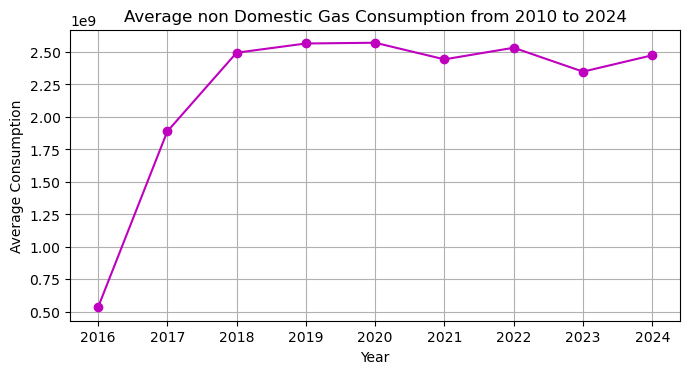

In [28]:
# Plotting
plt.figure(figsize=(7,4))
plt.plot(average_non_dom_gas['Year'], average_non_dom_gas['Value'], marker='o', color='m', linestyle='-')
plt.title('Average non Domestic Gas Consumption from 2010 to 2024')
plt.xlabel('Year')
plt.ylabel('Average Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()